In [26]:
# coding=utf-8
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
from matplotlib.font_manager import FontProperties
import joblib

In [27]:
dataFrame = pd.read_csv('./ENdata/reddit_3.csv')
doc_topic = np.load('./ENdata/topic14/doc_topic_3.npy')

model = joblib.load('./kmeansModel/EN14/batch3/14.model')
# 得出每个文档对应的分类
result = model.predict(doc_topic)
result

array([8, 5, 1, ..., 2, 4, 2])

In [28]:
dataFrame['time'][0][5:10]

'11-17'

{'11-04': array([110., 300., 167., 166., 146., 148., 366., 107., 131.,  83., 108.,
       125., 131., 140.]), '11-05': array([178., 388., 283., 244., 229., 228., 531., 164., 185., 116., 167.,
       158., 166., 205.]), '11-06': array([268., 569., 418., 288., 259., 433., 641., 271., 276., 175., 209.,
       234., 239., 208.]), '11-07': array([ 413.,  976., 1092.,  608.,  358.,  927.,  932.,  533.,  496.,
        316.,  297.,  367.,  522.,  366.]), '11-08': array([ 385.,  885., 1196.,  646.,  422.,  981.,  941.,  558.,  471.,
        360.,  305.,  344.,  491.,  385.]), '11-09': array([ 475.,  938., 1193.,  660.,  401., 1154., 1055.,  633.,  558.,
        341.,  340.,  441.,  481.,  388.]), '11-10': array([ 425., 1046., 1207.,  666.,  451., 1103.,  973.,  576.,  501.,
        343.,  311.,  397.,  478.,  386.]), '11-11': array([ 447.,  812., 1238.,  579.,  427., 1002., 1066.,  543.,  487.,
        360.,  380.,  432.,  537.,  404.]), '11-12': array([ 513., 1011., 1231.,  674.,  493., 1126.,

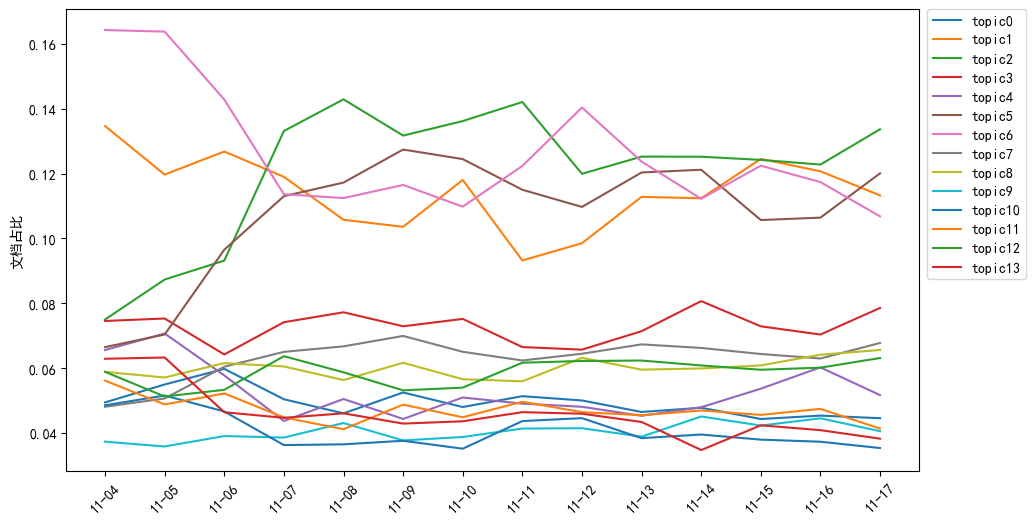

In [29]:
# 生成一个日期字符串列表，从"10月07日"开始到当前日期
dates = []
date = datetime.strptime("2023年11月04日", "%Y年%m月%d日")
date_count = {}
while True:
    dates.append(date.strftime("%m-%d"))
    date_count[date.strftime("%m-%d")] = np.zeros(14)
    date += timedelta(days=1)
    if date.month == 11 and date.day == 18:
        break

for i in range(len(result)):
    cur_date = dataFrame['time'][i][5:10]
    if cur_date not in dates:
        continue
    num = date_count[cur_date][result[i]]
    date_count[cur_date][result[i]] = num + 1
print(date_count)

x = dates
y = []
for date in dates:
    # print(date_count[date] / sum(date_count[date]))
    y.append(date_count[date] / sum(date_count[date]))
y = np.column_stack(y)

plt.figure(figsize=(11,6))
for i in range(14):
    plt.plot(x, y[i], '-', label=f'topic{i}')
# 设置支持中文的字体，例如：SimHei
font = FontProperties(fname=None, size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.xticks(rotation=45)
plt.ylabel('文档占比')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.savefig('./ENdata/topic14/第三部分趋势图.png')
plt.show()